In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mix_df = pd.read_csv("Mix_playlist.csv")

In [3]:
mix_df.describe(include="all")

,Unnamed: 0,Unnamed: 0.1,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,label
count,199.000000,199.000000,199,199,199,199,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
unique,NaN,NaN,158,190,199,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ali Gatie,Malibu Nights,Brand New Me,7Cuk8jsPPoNYQWXK9XRFvG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5,3,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.251256,49.251256,NaN,NaN,NaN,NaN,0.580025,0.564025,4.854271,-8.110151,0.763819,0.065039,0.023313,0.163430,0.495671,117.198693,217058.206030,3.884422,0.497487
std,28.796345,28.796345,NaN,NaN,NaN,NaN,0.130922,0.233751,3.652019,3.189280,0.425806,0.076262,0.105184,0.122332,0.275295,27.756445,44575.290765,0.483786,0.501255
min,0.000000,0.000000,NaN,NaN,NaN,NaN,0.209000,0.056500,0.000000,-20.017000,0.000000,0.025100,0.000000,0.018800,0.039700,64.002000,119133.000000,1.000000,0.000000
25%,24.500000,24.500000,NaN,NaN,NaN,NaN,0.501000,0.384000,1.000000,-9.492500,1.000000,0.033000,0.000000,0.088950,0.250500,98.006000,190693.500000,4.000000,0.000000
50%,49.000000,49.000000,NaN,NaN,NaN,NaN,0.568000,0.583000,5.000000,-7.433000,1.000000,0.041400,0.000001,0.111000,0.446000,115.284000,215107.000000,4.000000,0.000000
75%,74.000000,74.000000,NaN,NaN,NaN,NaN,0.681500,0.764000,8.000000,-5.939000,1.000000,0.058950,0.000154,0.195000,0.754000,133.712000,238626.500000,4.000000,1.000000


### Removing categorical variables

In [4]:
mix_df = mix_df.drop(["Unnamed: 0","Unnamed: 0.1","artist", "album", "track_name","track_id"], axis=1)

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


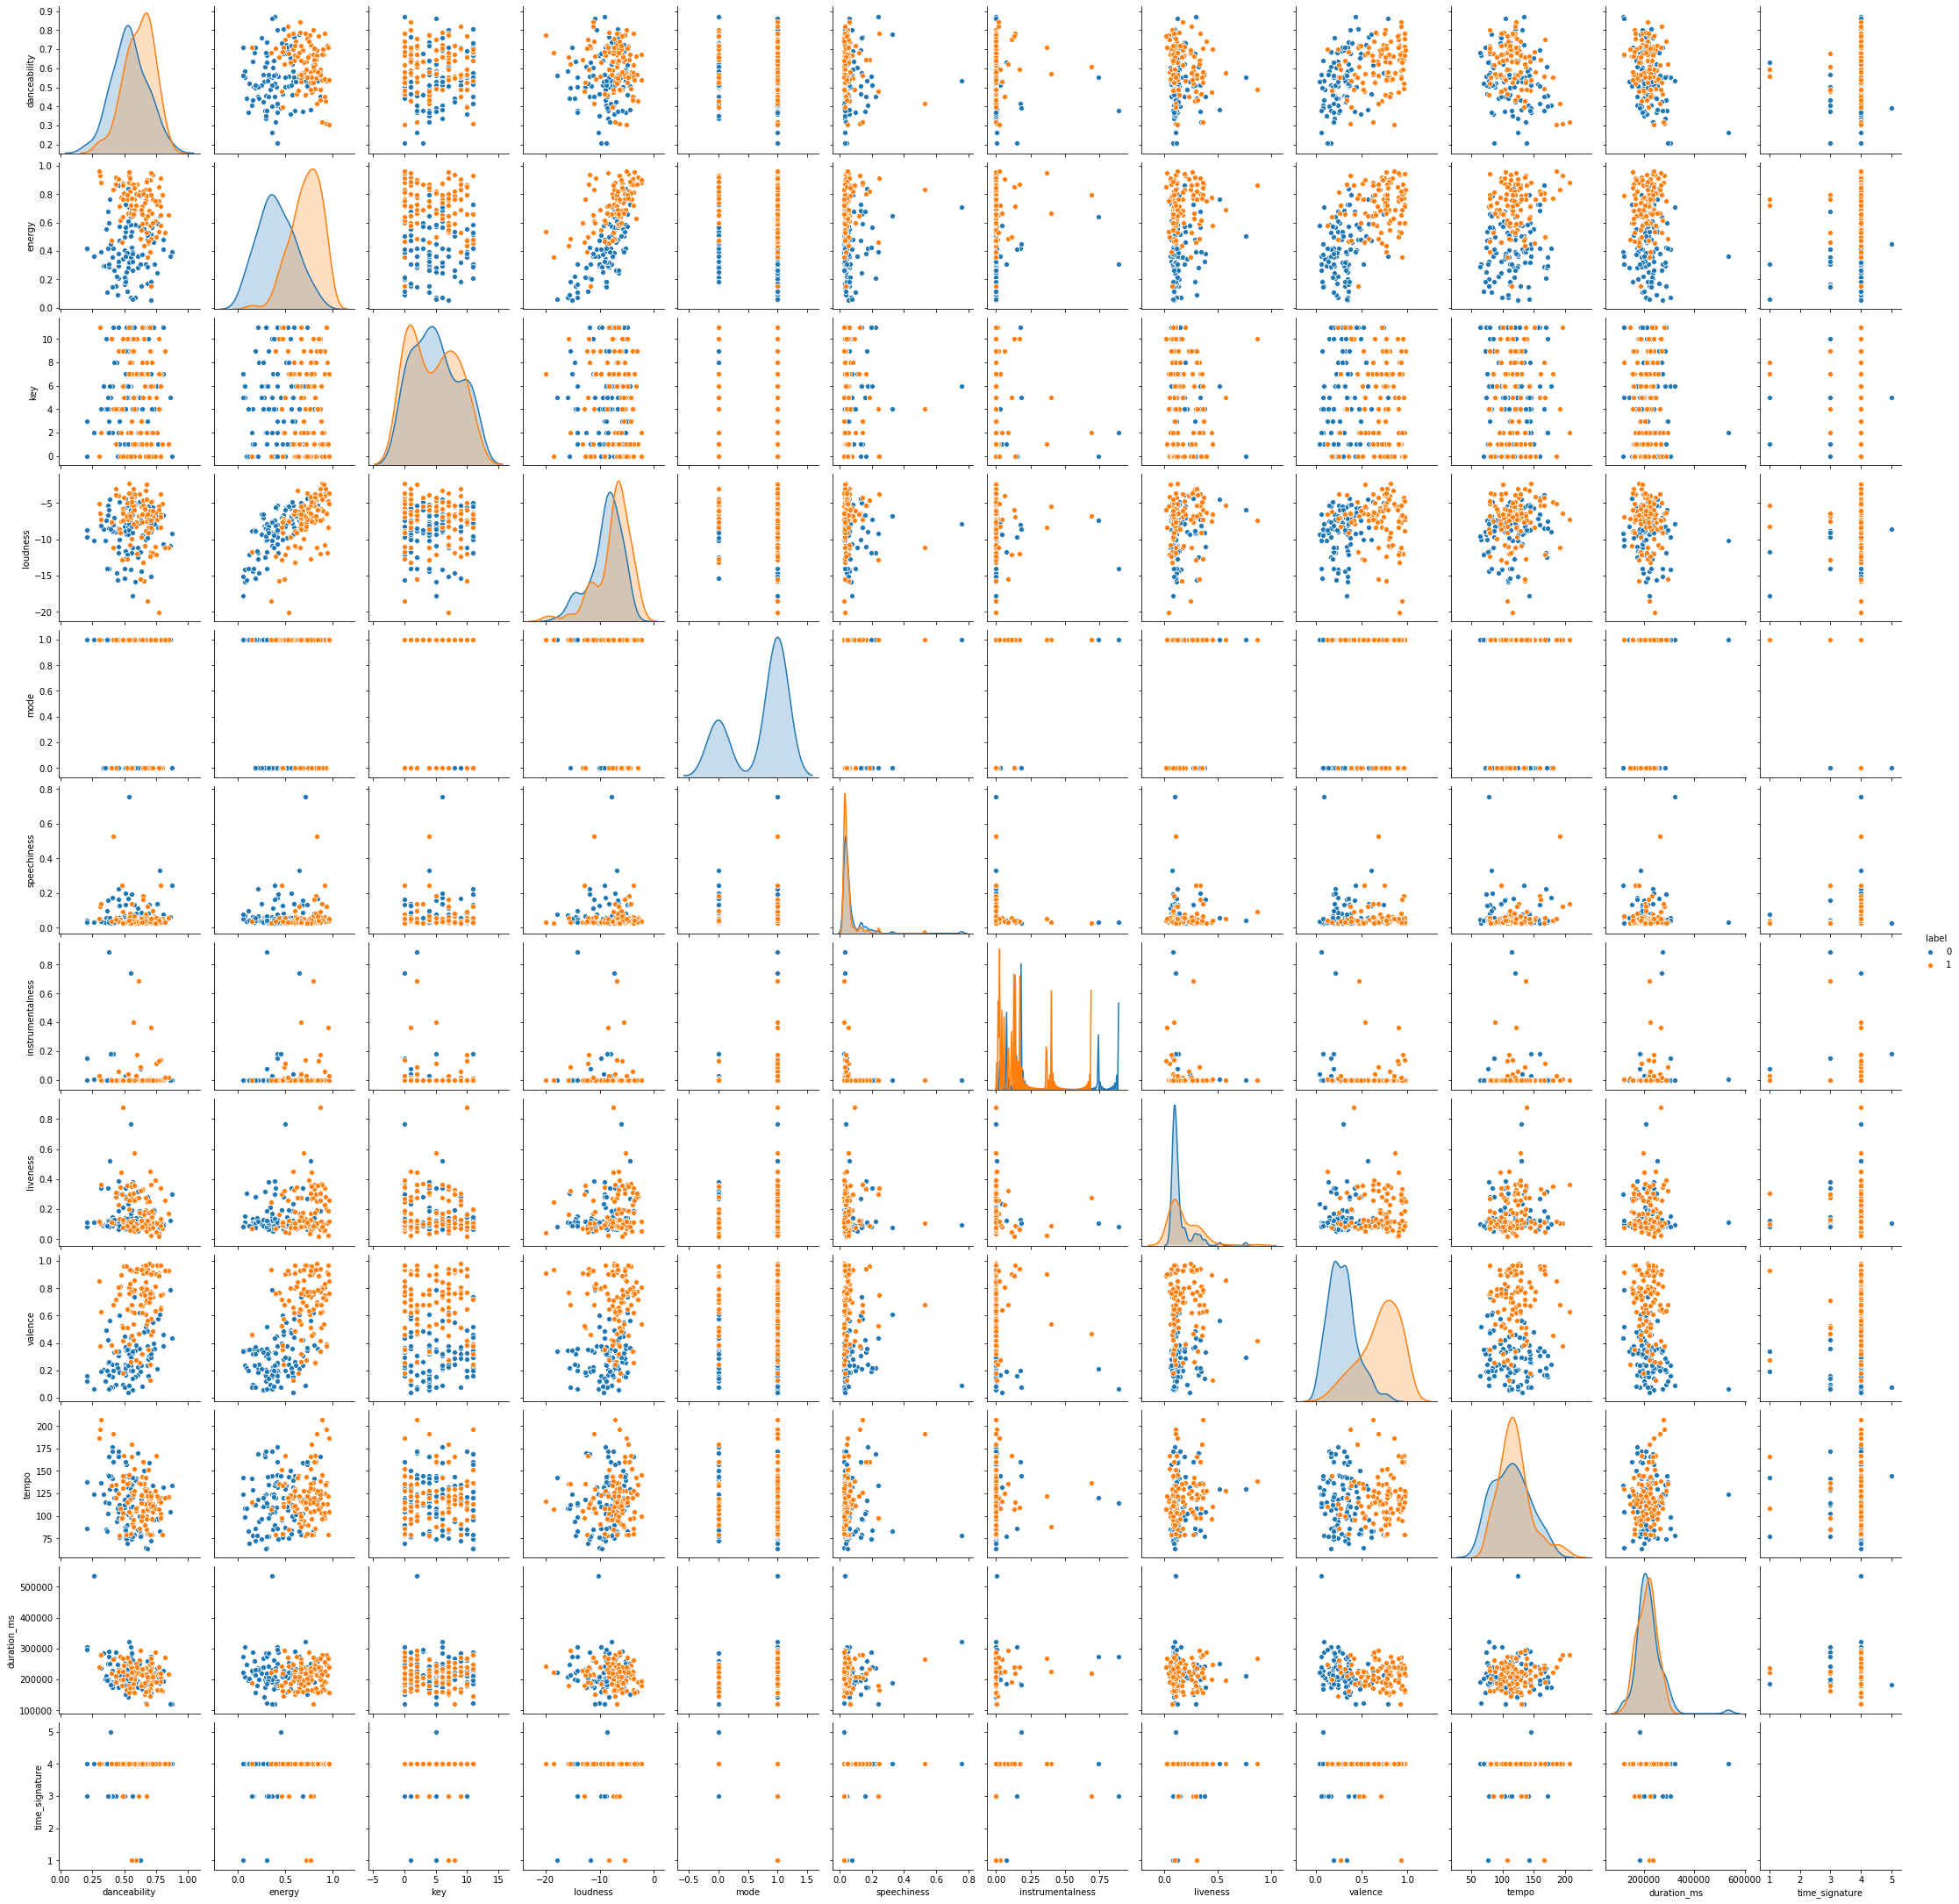

In [5]:
sns.pairplot(mix_df, hue="label")

### Correlation between various parameters and how closely are they related to the Label

Text(0.5, 1, 'Correlation Matrix')

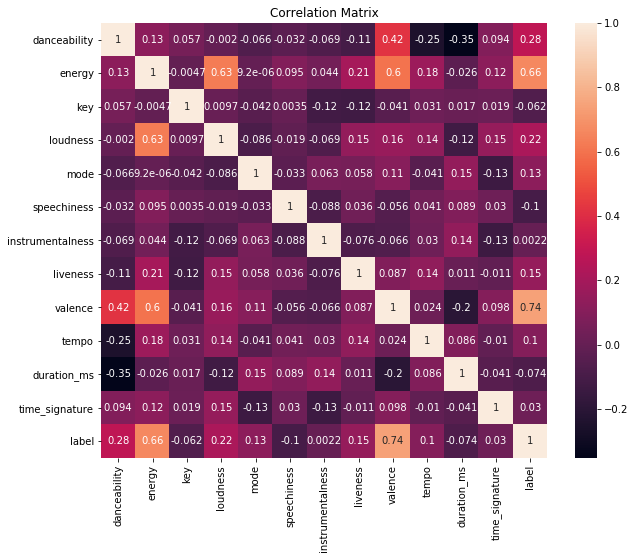

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(mix_df.corr(), annot=True)
plt.title("Correlation Matrix")
# sns.set_context("paper")

### Removing duration, speechiness and key as they are negatively correlated

In [7]:
mix_df = mix_df.drop(["duration_ms", "speechiness", "key"], axis=1)

#### Creating input features (X) and target (Y)

In [8]:
print(mix_df.shape)
X = mix_df.iloc[:,0:9]
Y = mix_df.iloc[:,9]

(199, 10)


### checking input features

In [9]:
X.head(2)

,danceability,energy,loudness,mode,instrumentalness,liveness,valence,tempo,time_signature
0,0.801,0.795,-5.115,0,0.000113,0.0717,0.754,79.028,4
1,0.552,0.643,-7.360,1,0.740000,0.1050,0.212,120.012,4


### Normalization

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 1.69209092,  0.99061369,  0.94149921, ...,  0.94073808,
        -1.37866943,  0.23950538],
       [-0.21459933,  0.3387104 ,  0.23580327, ..., -1.03302694,
         0.1016125 ,  0.23950538],
       [-1.32492097, -0.6348557 , -0.25299726, ..., -0.90921142,
         2.15802115,  0.23950538],
       ...,
       [-0.30648802,  1.68111652,  1.39383616, ...,  0.98079605,
        -0.44301885,  0.23950538],
       [-2.10597481,  1.69827187,  0.96256007, ...,  1.29397647,
         2.48716933,  0.23950538],
       [ 1.07184229,  0.1328462 ,  0.62904408, ..., -0.03521953,
        -0.22388771,  0.23950538]])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

### Starting with Neural Network

In [15]:
import tensorflow
from keras import Sequential
from keras.layers import Dense

In [17]:
classifier = Sequential()
# first layer and hidden
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=9))
# second hidden layer
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))

#output
classifier.add(Dense(1,activation='sigmoid', kernel_initializer='random_normal'))

#compiling neural network
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4964
Epoch 2/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6927 - accuracy: 0.5324
Epoch 3/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5324
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5899
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.6691
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.7482
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.8345
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6811 - accuracy: 0.8561
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.8633
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.8705
Epoch 11/

#### Train Accuracy

In [19]:
eval_model = classifier.evaluate(X_train, y_train)
eval_model

5/5 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.9281


[0.3141895830631256, 0.9280575513839722]

## Prediction

In [20]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[28  7]
 [ 4 21]]


#### Test Accuracy

In [22]:
test_acc = classifier.evaluate(X_test, y_test)
test_acc

2/2 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8167


[0.4388662278652191, 0.8166666626930237]